In [3]:
pip install pandera

In [48]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/SESRS_VAC_APLICACAO_23_09_2021-11_29.csv', encoding= 'unicode_escape', sep=';')


In [10]:
df.head()

,FAIXAETARIA,SEXO,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,RACA_COR,GRUPO,DETALHEGRUPO,DATA,TP_VACINA,LOTE,CNES,SISTEMA_ORIGEM,CD_MUN_RESIDENCIA
0,40 a 44,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Profissionais e Auxiliares de limpeza,18/01/2021,CoronaVac,202010020,3729559,Novo PNI,431490.0
1,45 a 49,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Profissionais e Auxiliares de limpeza,18/01/2021,CoronaVac,202010020,2237571,Novo PNI,431490.0
2,60 a 64,Masculino,1,431490,7,SEM INFORMACAO,Trabalhadores de Saúde,Médico,18/01/2021,AstraZeneca,4120Z005,3567664,Novo PNI,431490.0
3,25 a 29,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Técnico de Enfermagem,19/01/2021,CoronaVac,202010036,2237601,Novo PNI,431490.0
4,45 a 49,Feminino,1,431490,7,PRETA,Trabalhadores de Saúde,Técnico de Enfermagem,19/01/2021,CoronaVac,202010036,2237601,Novo PNI,430060.0


In [11]:
#Total de linhas e colunas
df.shape


(212264, 14)

In [12]:
df.columns

Index(['FAIXAETARIA', 'SEXO', 'DOSE', 'CD_MUNICIPIO', 'CD_REGIAO_COVID',
       'RACA_COR', 'GRUPO', 'DETALHEGRUPO', 'DATA', 'TP_VACINA', 'LOTE',
       'CNES', 'SISTEMA_ORIGEM', 'CD_MUN_RESIDENCIA'],
      dtype='object')

In [13]:
df.dtypes

FAIXAETARIA           object
SEXO                  object
DOSE                   int64
CD_MUNICIPIO           int64
CD_REGIAO_COVID        int64
RACA_COR              object
GRUPO                 object
DETALHEGRUPO          object
DATA                  object
TP_VACINA             object
LOTE                  object
CNES                   int64
SISTEMA_ORIGEM        object
CD_MUN_RESIDENCIA    float64
dtype: object

In [17]:
df.tail(30)


,FAIXAETARIA,SEXO,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,RACA_COR,GRUPO,DETALHEGRUPO,DATA,TP_VACINA,LOTE,CNES,SISTEMA_ORIGEM,CD_MUN_RESIDENCIA
212234,75 a 79,Feminino,1,431490,7,BRANCA,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,CoronaVac,210051,2264684,Novo PNI,431490.0
212235,75 a 79,Feminino,1,431490,7,BRANCA,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,CoronaVac,210048,2237792,Novo PNI,431490.0
212236,75 a 79,Feminino,1,431490,7,SEM INFORMACAO,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,CoronaVac,210048,2264382,Novo PNI,431490.0
212237,75 a 79,Masculino,1,431490,7,BRANCA,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,CoronaVac,210051,2264595,Novo PNI,431490.0
212238,75 a 79,Feminino,1,431490,7,SEM INFORMACAO,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,CoronaVac,210048,2264382,Novo PNI,431490.0
212239,70 a 74,Masculino,1,431490,7,BRANCA,Faixa Etária,Pessoas de 70 a 74 anos,15/03/2021,CoronaVac,4120ZO26,2264897,ESUS APS - NACIONAL (OFFLINE),431490.0
212240,75 a 79,Masculino,2,431490,7,BRANCA,Faixa Etária,Pessoas de 75 a 79 anos,15/03/2021,AstraZeneca,4120Z026,2264390,Novo PNI,431490.0
212241,70 a 74,Masculino,1,431490,7,SEM INFORMACAO,Faixa Etária,Pessoas de 70 a 74 anos,15/03/2021,CoronaVac,210051,8011060,Novo PNI,431490.0
212242,80 e mais,Masculino,2,431490,7,BRANCA,Faixa Etária,Pessoas de 80 anos ou mais,15/03/2021,AstraZeneca,4120Z026,2264390,Novo PNI,431490.0
212243,80 e mais,Masculino,2,431490,7,BRANCA,Faixa Etária,Pessoas de 80 anos ou mais,15/03/2021,CoronaVac,210039,2264390,Novo PNI,431490.0


In [18]:
df.describe()


,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,CNES,CD_MUN_RESIDENCIA
count,212264.000000,212264.0,212264.0,2.122640e+05,211598.000000
mean,1.310547,431490.0,7.0,4.345771e+06,430415.969678
std,0.462719,0.0,0.0,2.464888e+06,15169.801431
min,1.000000,431490.0,7.0,8.194900e+04,110002.000000
25%,1.000000,431490.0,7.0,2.262568e+06,431490.000000
50%,1.000000,431490.0,7.0,2.265214e+06,431490.000000
75%,2.000000,431490.0,7.0,6.883303e+06,431490.000000
max,2.000000,431490.0,7.0,9.948007e+06,999999.000000


In [19]:
df["TP_VACINA"].unique()

array(['CoronaVac', 'AstraZeneca', 'Pfizer'], dtype=object)

In [28]:
Pfizer = df.loc[df["TP_VACINA"] == "Pfizer"]
Pfizer.head()

,FAIXAETARIA,SEXO,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,RACA_COR,GRUPO,DETALHEGRUPO,DATA,TP_VACINA,LOTE,CNES,SISTEMA_ORIGEM,CD_MUN_RESIDENCIA
93469,30 a 34,Feminino,1,431490,7,BRANCA,Comorbidades,Pneumopatias Crônicas Graves,14/02/2021,Pfizer,EX2405,6883354,Novo PNI,431490.0
103034,50 a 54,Masculino,2,431490,7,BRANCA,Comorbidades,Outros Imunocomprometidos,16/02/2021,Pfizer,EW0195,651362,Novo PNI,431490.0


In [29]:
CoronaVac = df.loc[df["TP_VACINA"] == "CoronaVac"]
CoronaVac.head()

,FAIXAETARIA,SEXO,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,RACA_COR,GRUPO,DETALHEGRUPO,DATA,TP_VACINA,LOTE,CNES,SISTEMA_ORIGEM,CD_MUN_RESIDENCIA
0,40 a 44,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Profissionais e Auxiliares de limpeza,18/01/2021,CoronaVac,202010020,3729559,Novo PNI,431490.0
1,45 a 49,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Profissionais e Auxiliares de limpeza,18/01/2021,CoronaVac,202010020,2237571,Novo PNI,431490.0
3,25 a 29,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Técnico de Enfermagem,19/01/2021,CoronaVac,202010036,2237601,Novo PNI,431490.0
4,45 a 49,Feminino,1,431490,7,PRETA,Trabalhadores de Saúde,Técnico de Enfermagem,19/01/2021,CoronaVac,202010036,2237601,Novo PNI,430060.0
5,30 a 34,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Enfermeiro(a),19/01/2021,CoronaVac,202010036,2237601,Novo PNI,430770.0


In [30]:
AstraZeneca = df.loc[df["TP_VACINA"] == "AstraZeneca"]
AstraZeneca.head()

,FAIXAETARIA,SEXO,DOSE,CD_MUNICIPIO,CD_REGIAO_COVID,RACA_COR,GRUPO,DETALHEGRUPO,DATA,TP_VACINA,LOTE,CNES,SISTEMA_ORIGEM,CD_MUN_RESIDENCIA
2,60 a 64,Masculino,1,431490,7,SEM INFORMACAO,Trabalhadores de Saúde,Médico,18/01/2021,AstraZeneca,4120Z005,3567664,Novo PNI,431490.0
30,40 a 44,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Outros,19/01/2021,AstraZeneca,4120Z005,2237601,Novo PNI,431490.0
4605,35 a 39,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Recepcionista,20/01/2021,AstraZeneca,4120Z005,5026253,Novo PNI,431490.0
5662,30 a 34,Feminino,1,431490,7,SEM INFORMACAO,Trabalhadores de Saúde,Médico,21/01/2021,AstraZeneca,4120Z005,2693801,Novo PNI,430510.0
6482,35 a 39,Feminino,1,431490,7,BRANCA,Trabalhadores de Saúde,Técnico de Enfermagem,21/01/2021,AstraZeneca,4120Z005,2237601,Novo PNI,430920.0


In [43]:
df.groupby("SEXO")["GRUPO","TP_VACINA","RACA_COR","DOSE","FAIXAETARIA"].nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,GRUPO,TP_VACINA,RACA_COR,DOSE,FAIXAETARIA
SEXO,,,,,
Feminino,16,3,6,2,14
Masculino,14,3,6,2,14


In [44]:
df.groupby("FAIXAETARIA")["DOSE"].mean()

FAIXAETARIA
18 a 19      1.271220
20 a 24      1.308999
25 a 29      1.339108
30 a 34      1.352538
35 a 39      1.344667
40 a 44      1.345051
45 a 49      1.339591
50 a 54      1.343759
55 a 59      1.343944
60 a 64      1.345569
65 a 69      1.359395
70 a 74      1.362081
75 a 79      1.084954
80 e mais    1.335072
Name: DOSE, dtype: float64

In [47]:
df.groupby("GRUPO")["DETALHEGRUPO"].sum().sort_values(ascending=False)

GRUPO
Trabalhadores Industriais                                                  Trabalhadores Industriais
Comorbidades                                       Síndrome de DownOutros ImunocomprometidosOutro...
Povos e Comunidades Tradicionais                   QuilombolaQuilombolaQuilombolaQuilombolaQuilom...
Trabalhadores de Saúde                             Profissionais e Auxiliares de limpezaProfissio...
Povos Indígenas                                    Povos indígenas em terras indígenasPovos indíg...
Forças de Segurança e Salvamento                   Policial CivilGuarda MunicipalBombeiro CivilBo...
Pessoas em Situação de Rua                         Pessoas em Situação de RuaPessoas em Situação ...
Faixa Etária                                       Pessoas de 70 a 74 anosPessoas de 65 a 69 anos...
Pessoas de 60 anos ou mais institucionalizadas     Pessoas de 60 anos ou mais Institucionalizadas...
Pessoas com Deficiência                            Pessoas com Deficiência Institucio

In [45]:
df.isnull().sum()

FAIXAETARIA            0
SEXO                   0
DOSE                   0
CD_MUNICIPIO           0
CD_REGIAO_COVID        0
RACA_COR               0
GRUPO                  0
DETALHEGRUPO           0
DATA                   0
TP_VACINA              0
LOTE                   0
CNES                   0
SISTEMA_ORIGEM         0
CD_MUN_RESIDENCIA    666
dtype: int64

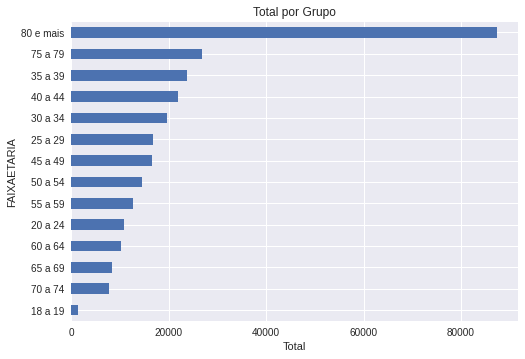

In [59]:
df.groupby("FAIXAETARIA")["DOSE"].sum().sort_values(ascending=True).plot.barh(title="Total por Grupo")
plt.xlabel("Total")
plt.ylabel("FAIXAETARIA");

In [65]:
df.groupby("TP_VACINA")["DOSE"].sum().sort_values(ascending=False)

TP_VACINA
CoronaVac      225470
AstraZeneca     52709
Pfizer              3
Name: DOSE, dtype: int64

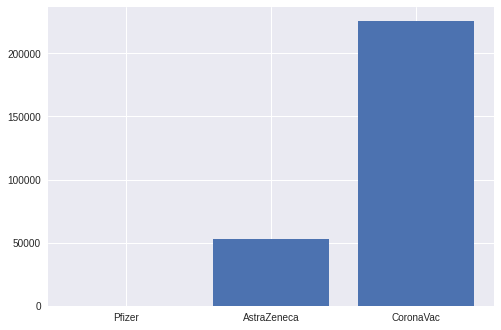

In [67]:
TP_VACINA = ['Pfizer', 'AstraZeneca', 'CoronaVac']
valores = [3, 52709, 225470]
plt.bar(TP_VACINA, valores)
plt.show()

In [61]:
df["TP_VACINA"].min()

'AstraZeneca'

In [62]:
df['TP_VACINA'].max()

'Pfizer'